# 1. Import Library yang kita butuhkan

- Pada perintah di bawah kami mengimport semua kebutuhan library yang kami butuhkan,
- Jika temen temen tidak mau import semua library yang di butuhkan dalam step 1 temen temen cukup import library json saja untuk menghubungkan dataset yang sudah kita buat.

### Perlu di note sebelumnya di virtual environment kami sudah Install and import library yang di butuhkan seperti **tensorflow, keras, keras-models, pickle, nltk**

Cara install:

- pip install tensorflow
- pip install keras
- pip install keras-models
- pip install pickle
- pip install nltk



In [2]:
!pip install tensorflow

91.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [8]:
!pip install keras

274.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [11]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

# create an object of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# importing the GL Bot corpus file for pre-processing

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open("data.json").read()
intents = json.loads(data_file)

FileNotFoundError: [Errno 2] No such file or directory: 'data.json'

# 2. Data pre-processing

In [12]:
# preprocessing the json data
# tokenization
nltk.download('punkt')
nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'intents' is not defined

### Tokenisasi

- Pada proses tokenisasi pada dasarnya adalah pemisahan kalimat, paragraf, 
atau seluruh dokumen teks menjadi unit yang lebih kecil, proses itu yang disebut token

- Pada proses ini juga akan save documen tersebut menjadi file label.pkl dan texts.pkl (proses labeling)

In [13]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

# creating a pickle file to store the Python objects which we will use while predicting
pickle.dump(words,open('texts.pkl','wb')) 
pickle.dump(classes,open('labels.pkl','wb'))

0 documents
0 classes []
0 unique lemmatized words []


# 3. Creating Training Data

- Pada dasarnya, bag of words adalah representasi sederhana dari setiap teks dalam sebuah kalimat sebagai bag of words-nya.

In [14]:
# create our training data
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
   
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# shuffle features and converting it into numpy arrays
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

print("Training data created")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# 5. Creating Modeling 

- Pada proses ini kami akan membuat model jaringan saraf dan menyimpan model tersebut 

In [ ]:
from tensorflow.keras.optimizers import SGD

# Create NN model to predict the responses
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model with new SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=1500, verbose=1)
model.save('models.h5', hist) # we will pickle this model to use in the future

print("\n")
print("*" * 50)
print("\nModel Created Successfully!")


Epoch 1/1500
35/35 [==============================] - 1s 4ms/step - loss: 5.7913 - accuracy: 0.0036
Epoch 2/1500
35/35 [==============================] - 0s 4ms/step - loss: 5.7831 - accuracy: 0.0055
Epoch 3/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7709 - accuracy: 0.0027
Epoch 4/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7658 - accuracy: 0.0018
Epoch 5/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7631 - accuracy: 0.0082
Epoch 6/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7514 - accuracy: 0.0118
Epoch 7/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7431 - accuracy: 0.0109
Epoch 8/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7256 - accuracy: 0.0109
Epoch 9/1500
35/35 [==============================] - 0s 4ms/step - loss: 5.7120 - accuracy: 0.0082
Epoch 10/1500
35/35 [==============================] - 0s 3ms/step - loss: 5.7043 - accuracy: 0.0164

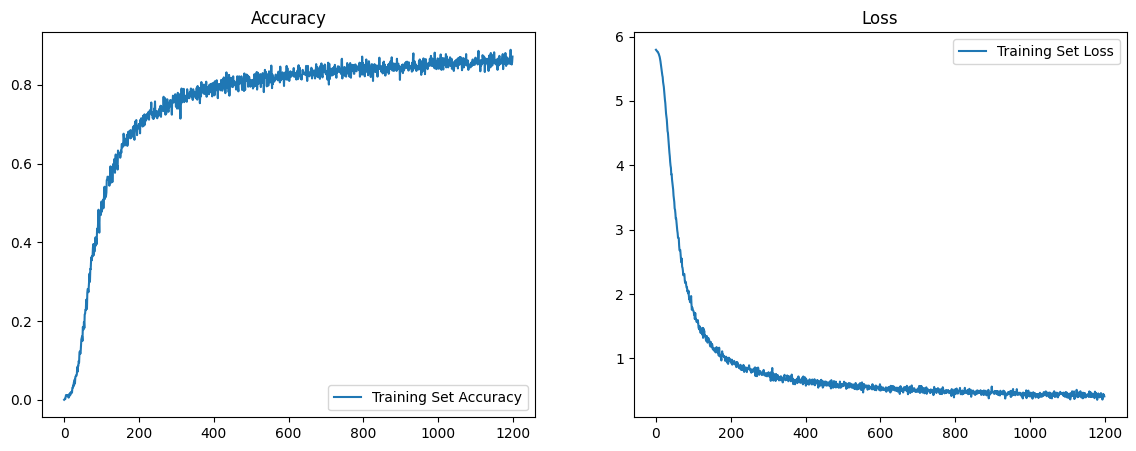

In [ ]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()